**AHSAN YOUSAF FA20-BCE-082**
**AI LAB**
**Lab Report 10**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn import linear_model
from sklearn import preprocessing

from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import pandas as pd
import csv

import matplotlib.pyplot as plt




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Read Data and fix seed

# fix random seed for reproducibility
np.random.seed(7)

df = pd.read_csv("Alumni Giving Regression (Edited) (1).csv", delimiter=",")

Text(0.5, 0, 'Columns')

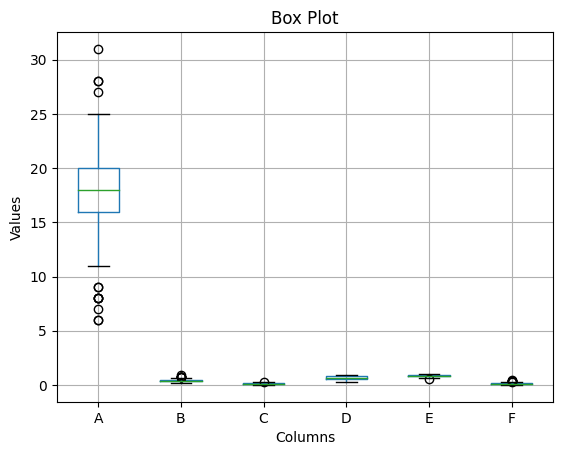

In [ ]:
import seaborn as sns
import pandas as pd
boxplot = pd.DataFrame(df).boxplot()
plt.title("Box Plot")
plt.ylabel('Values')
plt.xlabel('Columns')

Text(0, 0.5, 'Values')

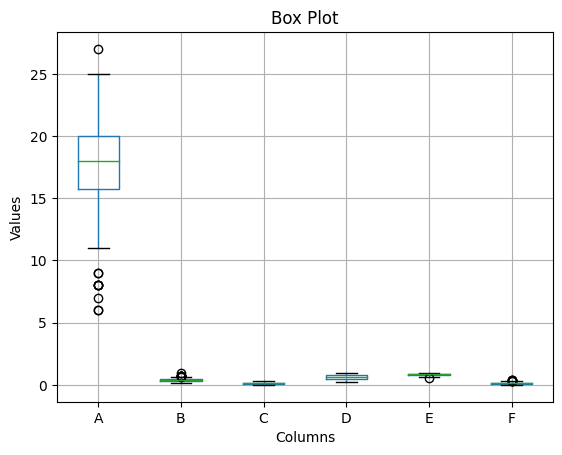

In [ ]:
# %%
quantile99 = df.iloc[:,0].quantile(0.99)
df1 = df[df.iloc[:,0] < quantile99]
df1.boxplot()
plt.title("Box Plot")
plt.xlabel('Columns')
plt.ylabel('Values')

Text(0.5, 0, 'Columns')

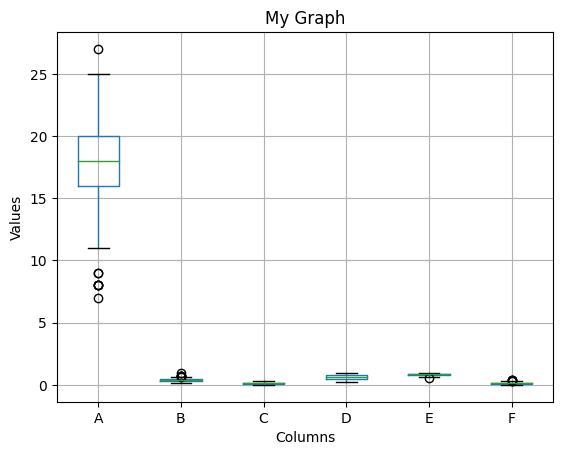

In [ ]:

# %%%
quantilel = df.iloc[:,0].quantile (0.01)
quantile99 = df.iloc[:,0].quantile (0.99)
df2 = df[(df.iloc[:,0]> quantilel) & (df.iloc[:,0] <quantile99)]
df2.boxplot()
plt.title("Box Plot")
plt.ylabel('Values')
plt.xlabel('Columns')


In [ ]:
# Feature ranking
model3 = RandomForestRegressor()
X = df[['A', 'B', 'C', 'D', 'F']]
y = df['E']

# Train the model on the data
model3.fit(X, y)

RandomForestRegressor()

In [ ]:

#Feature Ranking
RF = model3
importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_],axis=0)
indices = np.argsort (importances) [::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
  print("%d. feature (Column index) %s (%f)" % (f + 1, indices[f], importances[indices[f]]))

  df.dropna()

  # %%
indices_top3= indices[:3]
print(indices_top3)
dataset=df
df = pd.DataFrame(df)
Y_position= 5
TOP_N_FEATURE = 3
X = dataset.iloc[:, indices_top3]
Y = dataset.iloc[:,Y_position]
# create model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=2020)
#Model 1: linear regression
model1=linear_model.LinearRegression()
model1.fit(X_train, y_train)
y_pred_train1 = model1.predict(X_train)
print("Regression")

RMSE_train1 = mean_squared_error(y_train, y_pred_train1)
print("Regression TrainSet: RMSE {}".format(RMSE_train1))
y_pred1= model1.predict(X_test)
print("======")
RMSE_test1 = mean_squared_error(y_test,y_pred1)
print("Regression Testset: RMSE {}".format(RMSE_test1))
print("======")

Feature ranking:
1. feature (Column index) 3 (0.892467)
2. feature (Column index) 2 (0.037888)
3. feature (Column index) 1 (0.030620)
4. feature (Column index) 4 (0.021524)
5. feature (Column index) 0 (0.017500)


In [ ]:
df.dropna()

,A,B,C,D,E,F
0,24,0.42,0.16,0.59,0.81,0.08
1,19,0.49,0.04,0.37,0.69,0.11
2,18,0.24,0.17,0.66,0.87,0.31
3,8,0.74,0.00,0.81,0.88,0.11
4,8,0.95,0.00,0.86,0.92,0.28
...,...,...,...,...,...,...
118,11,0.54,0.03,0.89,0.94,0.29
119,15,0.37,0.22,0.69,0.83,0.13
120,23,0.32,0.19,0.59,0.80,0.12
121,19,0.43,0.06,0.49,0.73,0.13


In [ ]:
# %%
indices_top3= indices[:3]
print(indices_top3)
dataset=df
df = pd.DataFrame(df)
Y_position= 5
TOP_N_FEATURE = 3
X = dataset.iloc[:, indices_top3]
Y = dataset.iloc[:,Y_position]
# create model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=2020)
#Model 1: linear regression
model1=linear_model.LinearRegression()
model1.fit(X_train, y_train)
y_pred_train1 = model1.predict(X_train)
print("Regression")

RMSE_train1 = mean_squared_error(y_train, y_pred_train1)
print("Regression TrainSet: RMSE {}".format(RMSE_train1))
y_pred1= model1.predict(X_test)
print("======")
RMSE_test1 = mean_squared_error(y_test,y_pred1)
print("Regression Testset: RMSE {}".format(RMSE_test1))
print("======")

[3 2 1]
Regression
Regression TrainSet: RMSE 0.002796386754276771
Regression Testset: RMSE 0.004386394878107668
